In [1]:
try:
    output_filepath
except:
    output_filepath = 's3://workspaces-clarity-mgmt-pro/jaime.oliver/misc/social_capital/data/processed/'

In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [12]:
data_path = os.path.join(output_filepath, 'panel_data.parquet')
df_model = pd.read_parquet(data_path)
centralities = ['authorities', 'hubs', 'pagerank', 'gfi', 'bridging', 'favor']

df_model.eval('gdp_per_capita = gdp/wkn_population', inplace=True)
df_model.eval('productivity = gdp*10**6/(wkn_population*GFCF)', inplace=True)

df_model['human_authorities_cero'] = np.isclose(df_model.human_authorities, 0)
df_model['receiving_cuntries'] = df_model.groupby('country').human_authorities_cero.transform(lambda x: sum(x)<len(x))

df_model = df_model[~df_model.country.isin(['MNE', 'SRB', 'STP'])]

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


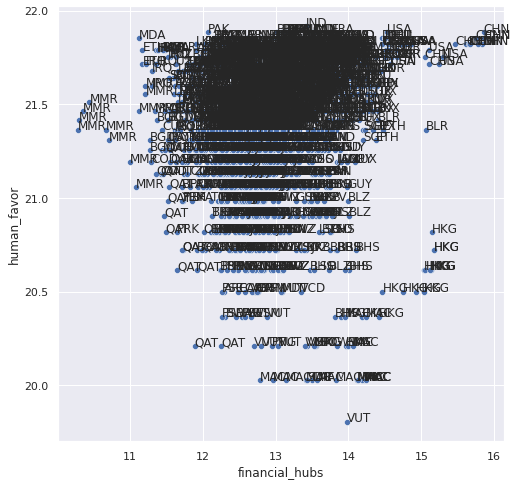

In [11]:
network = 'human'
network = 'human'

#network = 'financial'
#network = 'goods'

centrality = 'hubs'
#centrality = 'authorities'
#centrality = 'pagerank'
centrality = 'favor'
#centrality = 'bridging'

x_var = 'productivity'
x_var = 'gdp_per_capita'

x_var = f'financial_hubs'
y_var = f'{network}_{centrality}'

df_plot =  df_model[df_model.year.between(2001, 2016)]
#df_plot =  df_model[df_model.year == 2015]

#df_plot = df_plot[df_plot.receiving_cuntries]

for c in [x_var, y_var]:
    df_plot[c] = df_plot[c].map(lambda x: np.log1p(x*1.e8))

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_plot, x=x_var, y=y_var, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(df_plot[x_var], df_plot[y_var], df_plot['country'], plt.gca())

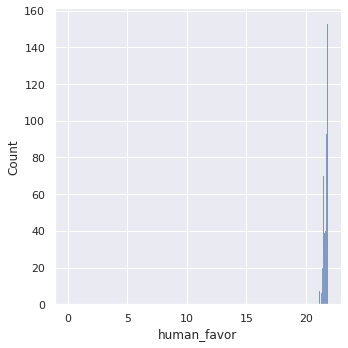

In [13]:
df_plot = df_model[df_model.receiving_cuntries].copy()
df_plot['human_favor'] = df_plot['human_favor'].map(lambda x: np.log1p(x*1.e8))
sns.displot(data = df_plot, x = 'human_favor') 

## Deep dive human hits

<AxesSubplot:ylabel='Density'>

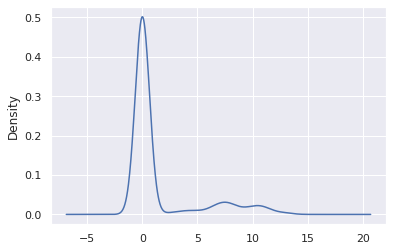

In [6]:
df_model.human_authorities.map(lambda x: np.log1p(x*1.e6)).plot(kind='kde')

In [7]:
df_model.groupby('country').human_authorities_cero.nunique().sort_values().tail(10)

country
NOR    2
NZL    2
DEU    2
CZE    2
ITA    2
POL    2
PRT    2
CHL    2
CAN    2
KOR    2
Name: human_authorities_cero, dtype: int64

In [8]:
df_model.groupby('country').year.nunique().sort_values()

country
ERI    12
AFG    19
MUS    19
MWI    19
MYS    19
       ..
GIN    19
GMB    19
GRC    19
FJI    19
ZWE    19
Name: year, Length: 169, dtype: int64

In [9]:
df_model[df_model.receiving_cuntries].groupby('country').human_authorities_cero.nunique()

country
AUS    1
AUT    2
BEL    2
CAN    2
CHE    2
CHL    2
CZE    2
DEU    2
DNK    2
ESP    2
EST    2
FIN    2
FRA    2
GBR    2
GRC    2
HUN    2
IRL    2
ISL    2
ISR    2
ITA    2
JPN    2
KOR    2
LUX    2
LVA    2
MEX    2
NLD    2
NOR    2
NZL    2
POL    2
PRT    2
SVK    2
SVN    2
SWE    2
TUR    2
USA    2
Name: human_authorities_cero, dtype: int64